In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.io import loadmat
import seaborn as sns
from scipy.integrate import trapz

***Part 2 A***

In [ ]:
# *****************************************************************************************************

In [131]:
data = scipy.io.loadmat('Assignment2_2A_NDM_2024.mat')['NDM_Assignment2']
n_participants, n_conditions = data.shape ######## check

#setting up a dictionary for reaction times in the beginning
rtimeDict = {0: [], 1: []}     

In [132]:
# **********************************************************************************************

In [133]:
for condition in range(2):
    for participant in range(n_participants):
        participant_data = data[participant, condition]
        trial_rts = []       
        
        for trial in participant_data:
            threshold_indices = np.where(trial >= 600)[0]
            if len(threshold_indices) > 300:
                rt = threshold_indices[0]  #first time threshold crssoing
            else:
                rt = np.nan  # If threshold is never reached, which doesn't happen here
                #added this just in case
            trial_rts.append(rt)
        
        rtimeDict[condition].append(trial_rts)

mean_rt_cond1 = np.nanmean(rtimeDict[0], axis=1)
mean_rt_cond2 = np.nanmean(rtimeDict[1], axis=1)

In [134]:
#i have checked the normality of data and with the help of p values(using shapiro wilk test), determining which test to perform
_, p_val_1 = stats.shapiro(mean_rt_cond1)
_, p_val_2 = stats.shapiro(mean_rt_cond2)


if p_val_1 > 0.05 and p_val_2 > 0.05:
    statistic, p_value = stats.ttest_ind(mean_rt_cond1, mean_rt_cond2, nan_policy='omit')
    test_name = "Independent t-test"
else:
    statistic, p_value = stats.mannwhitneyu(mean_rt_cond1, mean_rt_cond2)
    test_name = "Mann-Whitney U test"




In [135]:
# ***************************************************************************

In [136]:
# Print statistical results      
print("\nResults and metrics :")
print(f"{test_name} test was used")
print(f"Test statistic: {statistic}")
print(f"p-value: {p_value}")
print(f"\nCondition 1 (High Coherence): Mean RT = {np.nanmean(mean_rt_cond1):.1f} ms")
print(f"\nCondition 2 (Low Coherence): Mean RT = {np.nanmean(mean_rt_cond2):.1f} ms")


Results and metrics :
Mann-Whitney U test test was used
Test statistic: 0.0
p-value: 3.019859359162157e-11

Condition 1 (High Coherence): Mean RT = 212.1 ms

Condition 2 (Low Coherence): Mean RT = 381.8 ms


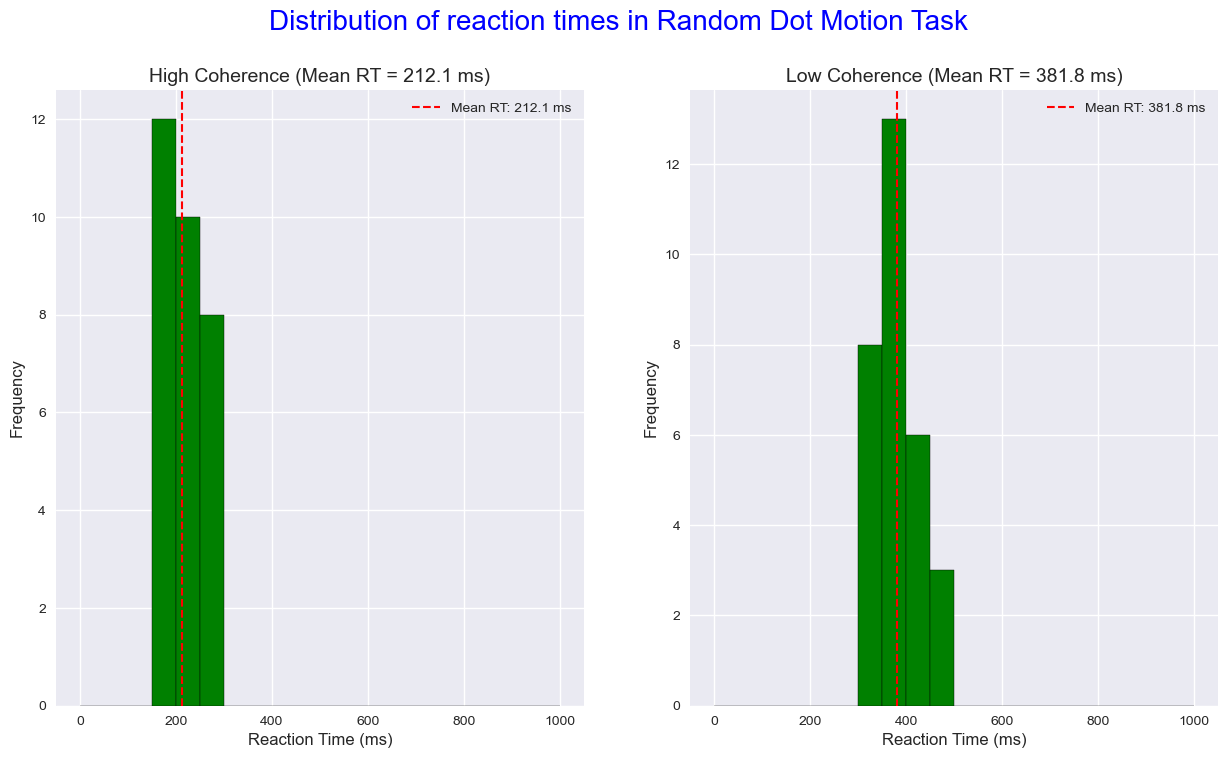

In [137]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), facecolor='white')
bins = np.linspace(0, 1000, 21)
condition_names = ['High Coherence', 'Low Coherence']

# Basic plot for each condition
for condition, (ax, name) in enumerate(zip([ax1, ax2], condition_names)):
    participant_means = np.nanmean(rtimeDict[condition], axis=1)
    mean_rt = np.nanmean(participant_means)
    
    ax.hist(participant_means, bins=bins, color='green', edgecolor='black')
    ax.axvline(mean_rt, color='red', linestyle='--', linewidth=1.5, label=f'Mean RT: {mean_rt:.1f} ms')
    
    ax.set_xlabel('Reaction Time (ms)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'{name} (Mean RT = {mean_rt:.1f} ms)', fontsize=14)
    ax.legend(fontsize=10)

plt.suptitle('Distribution of reaction times in Random Dot Motion Task', fontsize=20, color='blue')


plt.show()

In [138]:
# **********************************************************************************************

In [139]:
mean_rt_cond1

array([152.89, 270.99, 175.69, 159.37, 289.5 , 265.4 , 209.15, 164.2 ,
       252.94, 276.73, 183.36, 163.45, 261.58, 209.32, 227.21, 170.65,
       237.52, 237.44, 207.72, 209.87, 204.41, 172.56, 150.11, 165.01,
       178.02, 284.84, 180.73, 269.71, 227.31, 204.14])

In [130]:
mean_rt_cond2

array([506.22      , 342.63      , 483.66      , 534.13      ,
       344.25      , 353.57      , 383.68      , 507.63      ,
       523.01      , 375.02      , 396.87      , 363.83      ,
       415.67      , 528.64      , 371.66      , 419.56      ,
       362.68      , 354.95      , 401.48      , 408.17      ,
       354.83      , 458.7       , 374.75      , 337.04      ,
       337.62      , 405.4       , 375.86      , 326.57      ,
       363.03      , 352.78      , 440.57831325, 342.63      ,
       414.96428571, 456.125     , 335.85714286, 344.54081633,
       368.53125   , 439.19753086, 469.41176471, 371.72727273,
       386.78571429, 363.83      , 409.48979592, 458.43209877,
       368.15151515, 402.85416667, 357.83838384, 339.72164948,
       389.64948454, 388.33684211, 351.03030303, 425.03296703,
       374.75      , 337.04      , 333.66666667, 379.5       ,
       375.86      , 322.57575758, 357.50505051, 348.95959596])

***Part 2 B***

In [83]:
data_xl = pd.read_excel('Assignment2-2B-NDM-2024.xlsx', index_col = False)

file_path = 'Assignment2-2B-NDM-2024.xlsx'
xls = pd.ExcelFile(file_path)

auc_dict = {}

In [87]:
for cnt, sheet_name in enumerate(xls.sheet_names, start=1):
    #skipping the first row containing HA and FT
    df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=1)
    
    condition_aucs = []
    
    # i have seperated the HT and FA columns from the dataframe to make it simpler for me to 
    # perform the test

    if cnt == 1: # i have also used cnt to correct the first sheet column offset problem

        ht_cols = df.iloc[:, 1::3]
        fa_cols = df.iloc[:, 2::3]
    else:
        
        ht_cols = df.iloc[:, ::3]
        fa_cols = df.iloc[:, 1::3]
    
    # converting columns from object data typee to float64
    ht_cols = ht_cols.apply(pd.to_numeric, errors='coerce')
    fa_cols = fa_cols.apply(pd.to_numeric, errors='coerce')
    

    fa_cols.columns = ht_cols.columns    #in order to ensure no problems occur while performing operations on them
    

    for participant in range(ht_cols.shape[1]):
        ht = ht_cols.iloc[:, participant].values
        fa = fa_cols.iloc[:, participant].values


        sorted_indices = np.argsort(fa)
        fa_sorted = fa[sorted_indices]
        ht_sorted = ht[sorted_indices]

        auc_value = trapz(ht_sorted, fa_sorted)
        condition_aucs.append(auc_value)

    auc_dict[sheet_name] = condition_aucs  

auc_df = pd.DataFrame(auc_dict, columns=['Cond1', 'Cond2', 'Cond3', 'Cond4'])


    


In [88]:
print(auc_df)
for i in range(4):
    print(f"Mean AUC for Cond{i+1}: {auc_df.iloc[:, i].mean()}")


      Cond1     Cond2     Cond3     Cond4
0  0.754032  0.784729  0.744147  0.752992
1  0.670786  0.581296  0.771722  0.618496
2  0.750130  0.559443  0.759235  0.712669
3  0.677810  0.804240  0.758195  0.639048
4  0.784990  0.788371  0.730879  0.708767
5  0.586759  0.699662  0.546436  0.671566
6  0.720213  0.761316  0.828694  0.703564
7  0.766779  0.771982  0.854188  0.782388
8  0.728018  0.751951  0.782648  0.686915
9  0.726977  0.751431  0.875260  0.851327
Mean AUC for Cond1: 0.7166493236212279
Mean AUC for Cond2: 0.7254422476586888
Mean AUC for Cond3: 0.765140478668054
Mean AUC for Cond4: 0.7127731529656608


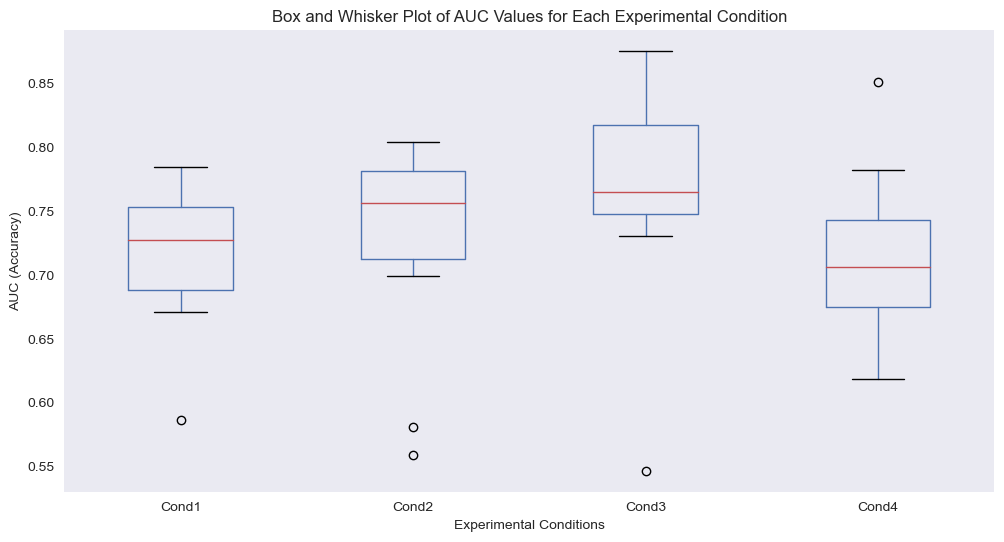

Friedman's Chi-square statistic: 5.400000000000006
p-value: 0.14474357941485547


In [89]:
plt.figure(figsize=(12, 6))
auc_df.boxplot()
plt.title('Box and Whisker Plot of AUC Values for Each Experimental Condition')
plt.xlabel('Experimental Conditions')
plt.ylabel('AUC (Accuracy)')
plt.grid(False)
plt.show()

friedman_stat, p_value = stats.friedmanchisquare(
    auc_df['Cond1'], auc_df['Cond2'], auc_df['Cond3'], auc_df['Cond4']
)

print(f"Friedman's Chi-square statistic: {friedman_stat}")
print(f"p-value: {p_value}")
